In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("C:\\Users\\rvcea\\OneDrive\\Desktop\\AIML lab\\orbits - orbits.csv")

In [3]:
df.head()

,Object Name,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Classification,Hazardous
0,433 Eros,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16,Amor Asteroid,False
1,719 Albert,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50,Amor Asteroid,False
2,887 Alinda,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40,Amor Asteroid,False
3,1036 Ganymed,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45,Amor Asteroid,False
4,1221 Amor,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70,Amor Asteroid,False


In [4]:
df.shape

(15635, 16)

In [5]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
lb1=LabelEncoder()
df['classification']=lb.fit_transform(df['Classification'])
df['hazardous']=lb1.fit_transform(df['Hazardous'])

df.head()

,Object Name,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Classification,Hazardous,classification,hazardous
0,433 Eros,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16,Amor Asteroid,False,0,0
1,719 Albert,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50,Amor Asteroid,False,0,0
2,887 Alinda,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40,Amor Asteroid,False,0,0
3,1036 Ganymed,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45,Amor Asteroid,False,0,0
4,1221 Amor,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70,Amor Asteroid,False,0,0


In [6]:
x=lb.inverse_transform([0,1,2,3])
print(x)

['Amor Asteroid' 'Apohele Asteroid' 'Apollo Asteroid' 'Aten Asteroid']


In [7]:
df.drop(['Object Name','Classification','Hazardous'],axis=1,inplace=True)
df.head()

,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,classification,hazardous
0,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16,0,0
1,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50,0,0
2,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40,0,0
3,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45,0,0
4,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70,0,0


In [8]:
df=df.dropna()
df.shape

(15634, 15)

In [9]:
df.isnull().sum()

Epoch (TDB)                                 0
Orbit Axis (AU)                             0
Orbit Eccentricity                          0
Orbit Inclination (deg)                     0
Perihelion Argument (deg)                   0
Node Longitude (deg)                        0
Mean Anomoly (deg)                          0
Perihelion Distance (AU)                    0
Aphelion Distance (AU)                      0
Orbital Period (yr)                         0
Minimum Orbit Intersection Distance (AU)    0
Orbital Reference                           0
Asteroid Magnitude                          0
classification                              0
hazardous                                   0
dtype: int64

<Axes: >

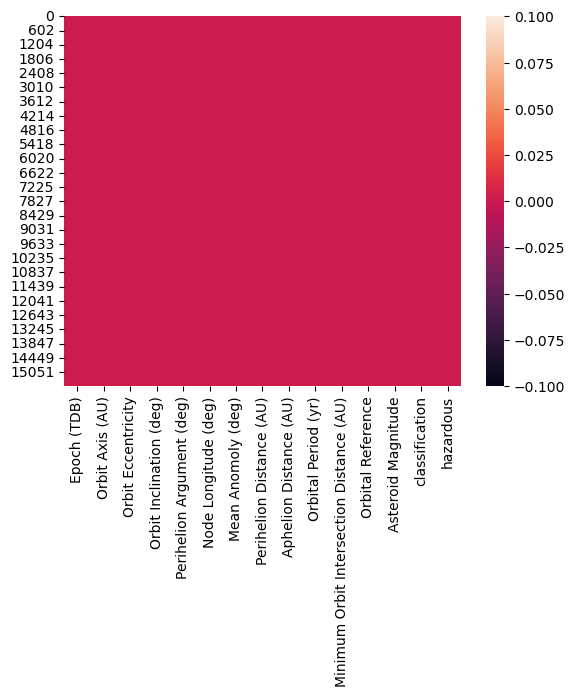

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.drop(['Node Longitude (deg)'],axis=1,inplace=True)

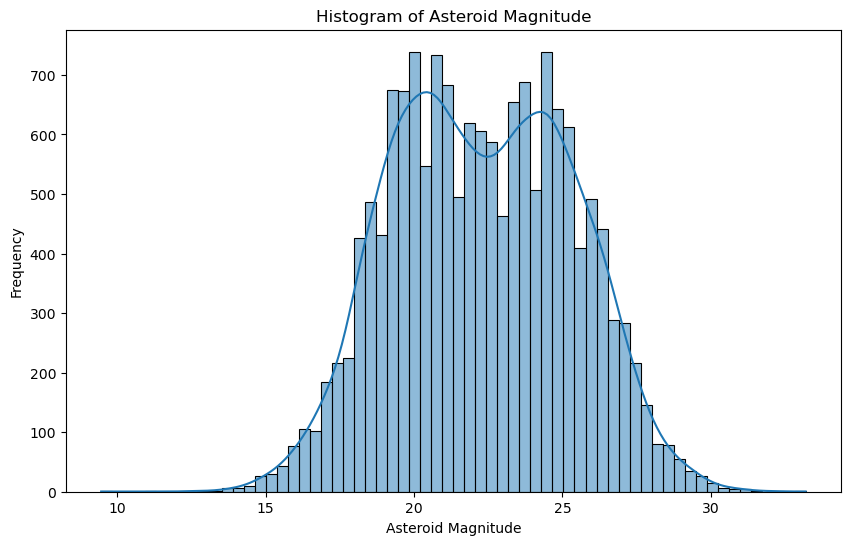

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Asteroid Magnitude'], kde=True) 
plt.title('Histogram of Asteroid Magnitude') 
plt.xlabel('Asteroid Magnitude') 
plt.ylabel('Frequency') 
plt.show()

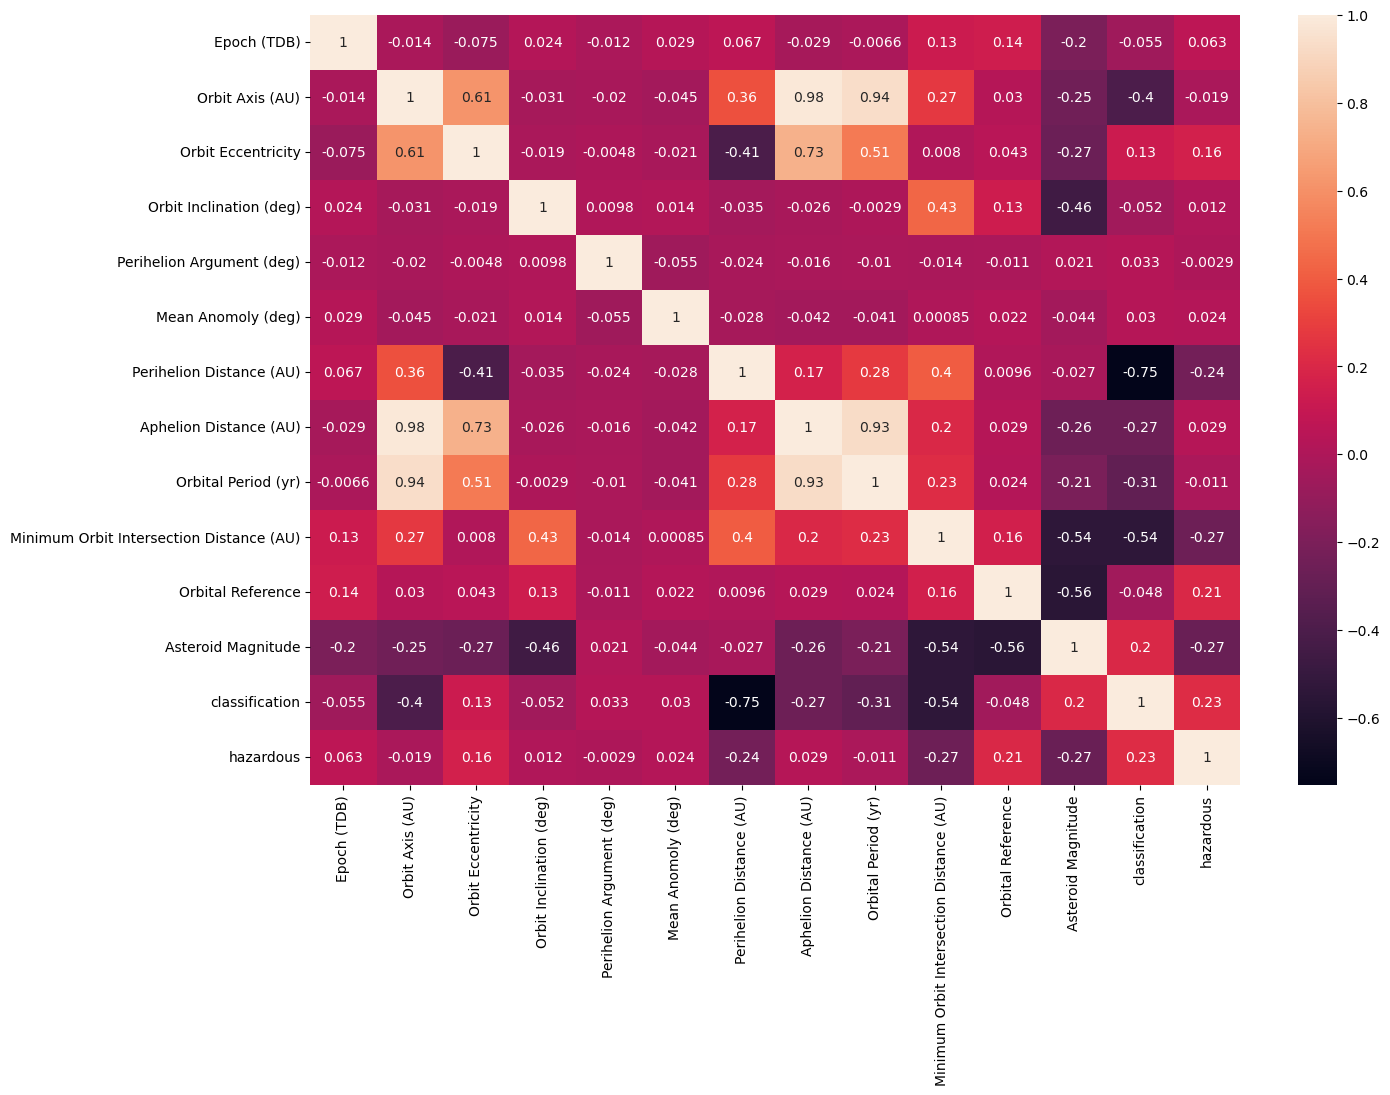

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.draw()

       Epoch (TDB)  Orbit Eccentricity  Perihelion Argument (deg)  \
0            57800              0.2226                   178.8050   
1            57800              0.5479                   156.1409   
2            57800              0.5671                   350.3482   
3            57800              0.5338                   132.4690   
4            57800              0.4356                    26.6572   
...            ...                 ...                        ...   
15630        57800              0.2946                   353.7433   
15631        57789              0.4429                   147.6444   
15632        57800              0.3275                    46.6749   
15633        57793              0.4646                     0.2261   
15634        57800              0.6672                   234.1260   

       Mean Anomoly (deg)  Perihelion Distance (AU)  \
0                319.3111                    1.1335   
1                224.5535                    1.1928   
2     

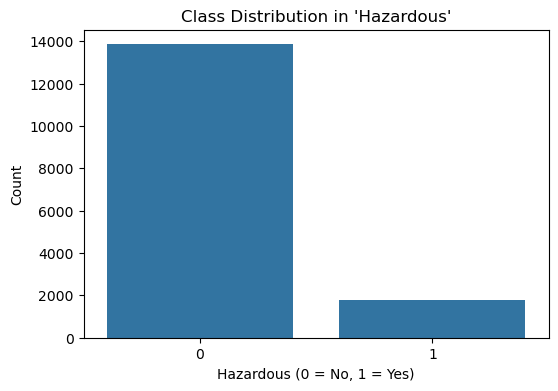

In [14]:
from sklearn.model_selection import train_test_split
df.drop(['classification','Aphelion Distance (AU)','Orbit Axis (AU)','Orbit Inclination (deg)','Orbital Period (yr)'],axis=1,inplace=True)

x=df.drop(['hazardous'],axis=1)
y=df['hazardous']
print(x)
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title("Class Distribution in 'Hazardous'")
plt.xlabel("Hazardous (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)
smote=SMOTE(sampling_strategy='minority',random_state=42)
xtrain,ytrain=smote.fit_resample(xtrain,ytrain)
print(ytrain.value_counts())


hazardous
0    9698
1    9698
Name: count, dtype: int64


In [16]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,max_depth=10,random_state=42)

In [17]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=100,random_state=42)
lr.fit(xtrain,ytrain)

LogisticRegression(random_state=42)

In [19]:
pred=rf.predict(xtest)
predlr=lr.predict(xtest)

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
a=accuracy_score(ytest,pred)
print(a)
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))

0.9995736516734172
[[4156    1]
 [   1  533]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4157
           1       1.00      1.00      1.00       534

    accuracy                           1.00      4691
   macro avg       1.00      1.00      1.00      4691
weighted avg       1.00      1.00      1.00      4691



In [21]:
print(accuracy_score(ytest,predlr))

0.9386058409720742


In [22]:
feature_importances = pd.DataFrame({
    'Feature': x.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importances)

                                    Feature  Importance
5  Minimum Orbit Intersection Distance (AU)    0.354727
7                        Asteroid Magnitude    0.335638
4                  Perihelion Distance (AU)    0.158175
6                         Orbital Reference    0.107909
1                        Orbit Eccentricity    0.023050
0                               Epoch (TDB)    0.009731
2                 Perihelion Argument (deg)    0.005816
3                        Mean Anomoly (deg)    0.004954


In [23]:
from sklearn.svm import SVC
# svm = SVC(kernel='linear', random_state=42)
# svm.fit(xtrain, ytrain)
# print("SVM Accuracy:", accuracy_score(ytest, svm.predict(xtest)))

In [24]:
svmrbf=SVC(kernel='poly',degree=3,random_state=42)
svmrbf.fit(xtrain,ytrain)


SVC(kernel='poly', random_state=42)

In [25]:
predrbf=svmrbf.predict(xtest)
print(accuracy_score(ytest, predrbf))

0.943722020891068


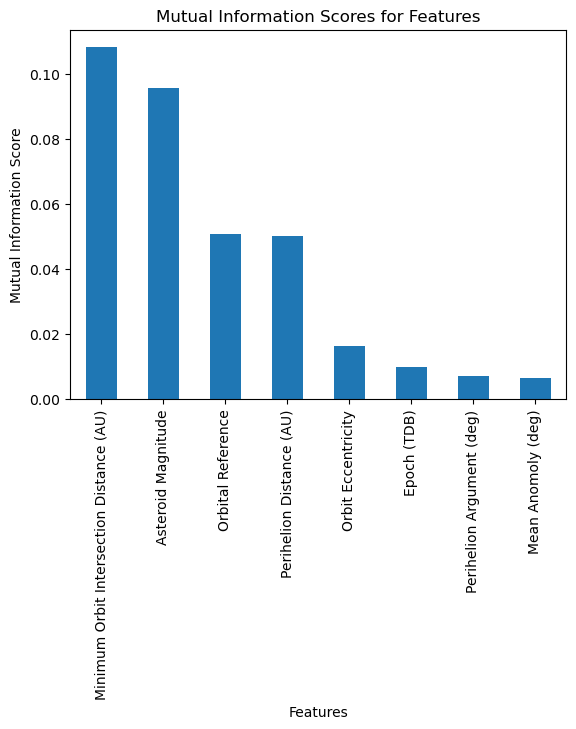

In [26]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(x, y)
mi_scores = pd.Series(mi_scores, index=x.columns)
mi_scores.sort_values(ascending=False).plot(kind='bar')

plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Scores for Features')
plt.show()

In [27]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'C': [0.1, 1, 10],
#     'gamma': [0.01, 0.1],
#     'kernel': ['rbf','linear']
# }

# grid = GridSearchCV(SVC(), param_grid, cv=2, scoring='accuracy', n_jobs=-1)
# grid.fit(xtrain, ytrain)

# print(grid.cv_results_)
# print("Best parameters:", grid.best_params_)


In [28]:
# from sklearn.model_selection import RandomizedSearchCV

# # Define a more focused parameter distribution with specific value ranges
# param_dist = {
#     'C': [0.1, 1.0],  # Reduced number of C values
#     'gamma': ['scale', 'auto'],  # Using scale and auto instead of numerical values
#     'kernel': ['rbf'],  # Focus on RBF kernel which often performs well
# }

# # Create a more efficient RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=SVC(),
#     param_distributions=param_dist,
#     n_iter=2,  # Reduced number of iterations
#     cv=2,  # Using 3-fold CV instead of 2 for better stability
#     scoring='accuracy',
#     n_jobs=-1,  # Use all available cores
#     random_state=42,
#     verbose=0
# )

# random_search.fit(xtrain, ytrain)

# print("\nBest parameters:", random_search.best_params_)
# print("Best cross-validation score: {:.3f}".format(random_search.best_score_))

# bestsvm = random_search.best_estimator_
# pred_best = bestsvm.predict(xtest)

# # Evaluate the model
# print("\nTest Set Performance:")
# print("Accuracy:", accuracy_score(ytest, pred_best))
# print("\nClassification Report:")
# print(classification_report(ytest, pred_best))
# print("\nConfusion Matrix:")
# print(confusion_matrix(ytest, pred_best))

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

param_dist = {
    'C': [0.1, 1.0],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf','poly']
}

random_search = RandomizedSearchCV(
    estimator=SVC(probability=True),
    param_distributions=param_dist,
    n_iter=3,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=0
)

random_search.fit(xtrain, ytrain)
print("\nBest parameters:", random_search.best_params_)
print("Best cross-validation score: {:.3f}".format(random_search.best_score_))

best_model = random_search.best_estimator_

predictions = best_model.predict(xtest)
decision_scores = best_model.decision_function(xtest)

confidence_scores = np.abs(decision_scores)
normalized_confidence = (confidence_scores - confidence_scores.min()) / (confidence_scores.max() - confidence_scores.min())

results = pd.DataFrame({
    'Predicted_Class': predictions,
    'True_Class': ytest,
    'Decision_Score': decision_scores,
    'Confidence_Score': normalized_confidence
})

results_sorted = results.sort_values('Confidence_Score', ascending=False)

print("\nTest Set Performance:")
print("Accuracy:", accuracy_score(ytest, predictions))
print("\nClassification Report:")
print(classification_report(ytest, predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(ytest, predictions))

print("\nSample Predictions with Confidence Scores (sorted by confidence):")
print(results_sorted.head(10))

print("\nConfidence Score Statistics:")
print(results['Confidence_Score'].describe())

threshold = 0.2
borderline_cases = results[results['Confidence_Score'] < threshold]
print(f"\nNumber of borderline cases (confidence < {threshold}): {len(borderline_cases)}")



Best parameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 0.1}
Best cross-validation score: 0.954

Test Set Performance:
Accuracy: 0.931784267746749

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      4157
           1       0.63      1.00      0.77       534

    accuracy                           0.93      4691
   macro avg       0.81      0.96      0.86      4691
weighted avg       0.96      0.93      0.94      4691


Confusion Matrix:
[[3838  319]
 [   1  533]]

Sample Predictions with Confidence Scores (sorted by confidence):
       Predicted_Class  True_Class  Decision_Score  Confidence_Score
12779                0           0       -4.860178          1.000000
14104                0           0       -4.606600          0.947816
13666                0           0       -4.595917          0.945618
11961                0           0       -4.591513          0.944712
14289                0           0       

In [30]:
# bestsvm = grid.best_estimator_
# pred_best = bestsvm.predict(xtest)
# print("Best SVM Accuracy:", accuracy_score(ytest, pred_best))
# print(classification_report(ytest, pred_best))
# print()
# print(confusion_matrix(ytest,pred_best))

In [31]:
import pickle

objects_to_save = {
    'model': best_model,
    'scaler': scaler,
    'feature_columns': x.columns.tolist(),
    'label_encoder_hazardous': lb1,
    'smote': smote,
    'model_metadata': {
        'best_parameters': random_search.best_params_,
        'feature_names': x.columns.tolist(),
        'creation_date': pd.Timestamp.now().strftime('%Y-%m-%d'),
        'model_version': '1.0'
    }
}

with open('asteroid_classification_objects.pkl', 'wb') as f:
    pickle.dump(objects_to_save, f)

In [32]:
print(lb1.inverse_transform(predictions))

[False False False ... False False False]


In [33]:
class_1_predictions = results[results['Predicted_Class'] == 1]
print(class_1_predictions)

       Predicted_Class  True_Class  Decision_Score  Confidence_Score
6143                 1           0        0.891519          0.183291
1921                 1           1        2.715672          0.558683
4818                 1           0        0.098353          0.020065
4579                 1           1        2.084105          0.428713
8592                 1           1        0.923590          0.189891
...                ...         ...             ...               ...
6676                 1           0        0.540851          0.111127
6415                 1           1        1.573035          0.323540
4833                 1           0        0.553585          0.113747
14183                1           0        0.143960          0.029451
1292                 1           0        0.197860          0.040543

[852 rows x 4 columns]


In [34]:
df.columns

Index(['Epoch (TDB)', 'Orbit Eccentricity', 'Perihelion Argument (deg)',
       'Mean Anomoly (deg)', 'Perihelion Distance (AU)',
       'Minimum Orbit Intersection Distance (AU)', 'Orbital Reference',
       'Asteroid Magnitude', 'hazardous'],
      dtype='object')

In [35]:
columns = [
    'Epoch (TDB)', 'Orbit Eccentricity', 'Perihelion Argument (deg)',
    'Mean Anomoly (deg)', 'Perihelion Distance (AU)',
    'Minimum Orbit Intersection Distance (AU)', 'Orbital Reference',
    'Asteroid Magnitude'
]
data = {
    'Epoch (TDB)': [2459000.5],
    'Orbit Eccentricity': [0.1],
    'Perihelion Argument (deg)': [150.0],
    'Mean Anomoly (deg)': [0.0],
    'Perihelion Distance (AU)': [0.5],
    'Minimum Orbit Intersection Distance (AU)': [0.05],
    'Orbital Reference': [1],
    'Asteroid Magnitude': [22.0]
}

d = pd.DataFrame(data, columns=columns)
d=scaler.transform(d)
pred=best_model.predict(d)
dec=best_model.decision_function(d)
print(pred,dec)

[0] [-0.52769466]


In [36]:
class_1_indices = np.where(predictions == 1)[0]

class_1_attributes_scaled = xtest[class_1_indices]

class_1_attributes_unscaled = scaler.inverse_transform(class_1_attributes_scaled)

class_1_attributes_unscaled_df = pd.DataFrame(class_1_attributes_unscaled, columns=columns)

class_1_attributes_unscaled_df.head()


,Epoch (TDB),Orbit Eccentricity,Perihelion Argument (deg),Mean Anomoly (deg),Perihelion Distance (AU),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude
0,57800.0,0.4761,237.3456,149.9213,0.8039,0.0579,19.0,20.2
1,57800.0,0.6675,106.5850,218.7455,0.7290,0.0020,28.0,19.8
2,57800.0,0.5318,134.2756,239.1940,0.7839,0.0819,11.0,19.7
3,57800.0,0.3163,317.5424,248.5228,0.5759,0.0154,29.0,19.7
4,57800.0,0.5792,258.8108,286.2153,0.8145,0.0309,14.0,21.4
